In [46]:
import matplotlib
matplotlib.use("TkAgg")
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from matplotlib import pyplot as plt    
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
def preprocess(df):
    print('----------------------------------------------')
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Replace 0 values with the mean of the existing values
    df['Glucose'] = df['Glucose'].replace(0, np.nan)
    df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
    df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
    df['Insulin'] = df['Insulin'].replace(0, np.nan)
    df['BMI'] = df['BMI'].replace(0, np.nan)
    df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
    df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
    df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
    df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
    df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

    print('----------------------------------------------')
    print("After preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # Standardization
    df_scaled = preprocessing.scale(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    df_scaled['Outcome'] = df['Outcome']
    df = df_scaled
    return df

In [5]:
np.random.seed(16)

try:
    df = pd.read_csv('diabetes.csv')
except:
    print("""
      Dataset not found in your computer.""")
    quit()

In [6]:

# look at the first 5 rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# show histogram
df.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8F19D4AC8>,
      dtype=object)

In [14]:
# Perform preprocessing and feature engineering
df = preprocess(df)

----------------------------------------------
Before preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------
----------------------------------------------
After preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------


In [15]:
# Split the data into a training and testing set
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Build neural network in Keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=False)

In [17]:
# Results - Accuracy
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 89.90%

Testing Accuracy: 81.17%



In [39]:
# Results - F1Score
y_test_pred = model.predict_classes(X_test)
f1_score_result = f1_score(y_test.values, y_test_pred.flatten())
f1_score_result

0.6947368421052632

Text(0, 0.5, 'True Positive Rate')

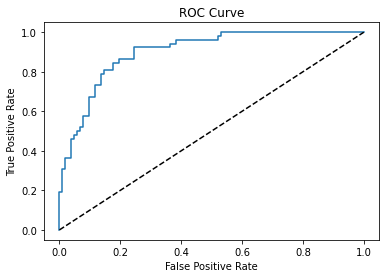

In [45]:
# Results - ROC Curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
